In [1]:
# Python packages

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
# Loading dataset

dataset = pd.read_csv("https://raw.githubusercontent.com/iamaakashpal/Insurance-Premium-Prediction/main/dataset/archive.zip")

In [3]:
# Displaying dataset

dataset

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
# Duplicate value

dataset[dataset.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [5]:
# Dropping Duplicate Values

dataset.drop_duplicates(inplace=True)

In [6]:
# Shape of dataset

dataset.shape   

(1337, 7)

In [7]:
# Top 5 records of the dataset

dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [8]:
# Converting categorical variable into numerical variable

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
dataset['sex']= encoder.fit_transform(dataset['sex'])
dataset['smoker']= encoder.fit_transform(dataset['smoker'])
dataset['region']= encoder.fit_transform(dataset['region'])

In [10]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


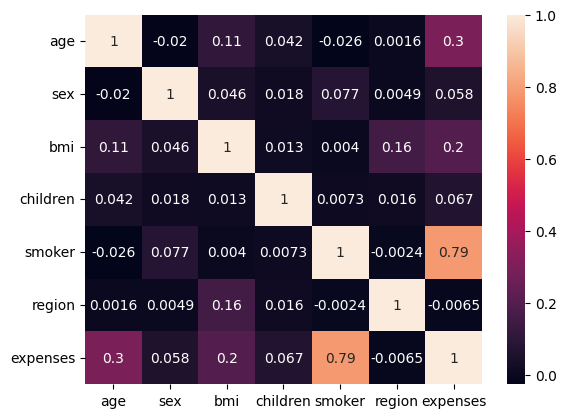

In [11]:
# correlation

sns.heatmap(dataset.corr(),annot=True)
plt.show()

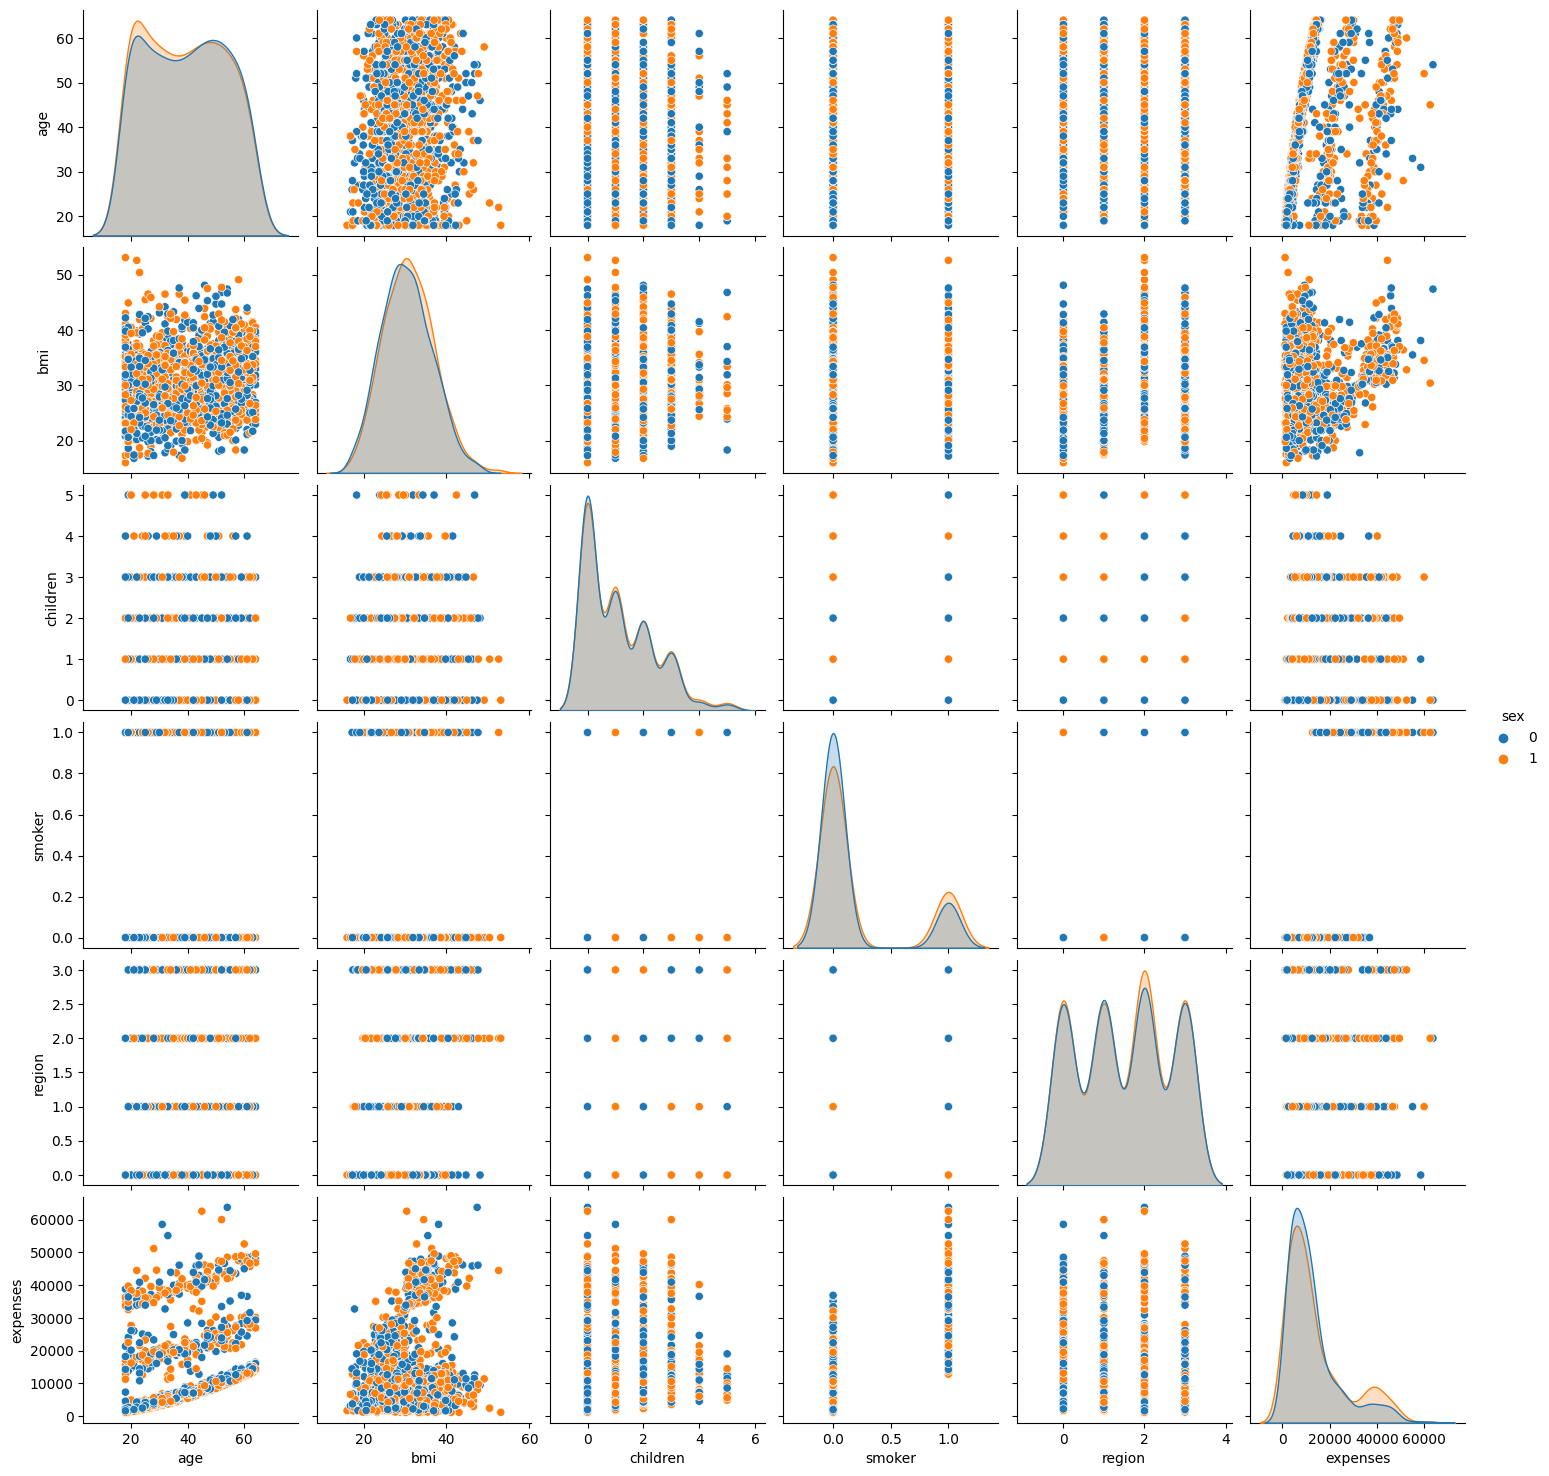

In [12]:
sns.pairplot(dataset,hue='sex')
plt.show()

In [13]:
# Splitting Data into Independent and Dependent Variable

x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [14]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1


In [15]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [16]:
x.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
dtype: object

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=7)

In [18]:
x_train.shape

(1069, 6)

In [19]:
x_test.shape

(268, 6)

In [20]:
y_train.shape

(1069,)

In [21]:
y_test.shape

(268,)

In [22]:
# scaling dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
x_train_scaled = scaler.fit_transform(x_train)

In [24]:
x_test_scaled = scaler.transform(x_test)

In [25]:
from sklearn.linear_model import LinearRegression
lregression = LinearRegression()

In [26]:
lregression.fit(x_train_scaled,y_train)

LinearRegression()

In [27]:
y_pred = lregression.predict(x_test_scaled)

In [28]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.7438478042941106


In [29]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [30]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [31]:
y_pred=gbr.predict(x_test)

In [32]:
score = r2_score(y_test, y_pred)
print(score)

0.8502097357420386


In [33]:
gbr.fit(x_train_scaled,y_train)

GradientBoostingRegressor()

In [34]:
y_pred=gbr.predict(x_test_scaled)

In [35]:
score = r2_score(y_test, y_pred)
print(score)

0.850692330443278


In [36]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [37]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [52]:
y_pred=dtr.predict(x_test)

In [53]:
score=r2_score(y_test,y_pred)
print(score)

0.7106217996849136
